<a href="https://colab.research.google.com/github/junyoungg/mppi_cem_tutorial/blob/main/mppi_cem_tutorial_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/junyoungg/mppi_cem_tutorial.git

Cloning into 'mppi_cem_tutorial'...
remote: Enumerating objects: 517, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 517 (delta 15), reused 14 (delta 7), pack-reused 489 (from 1)
Receiving objects: 100% (517/517), 32.16 MiB | 11.47 MiB/s, done.
Resolving deltas: 100% (306/306), done.


In [1]:
%cd /content/mppi_cem_tutorial
!git pull
%cd /content

/content/mppi_cem_tutorial
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 21 (delta 15), reused 13 (delta 9), pack-reused 0 (from 0)
Unpacking objects: 100% (21/21), 7.34 MiB | 5.23 MiB/s, done.
From https://github.com/junyoungg/mppi_cem_tutorial
   8226cfb..20f268b  main       -> origin/main
Updating 8226cfb..20f268b
Fast-forward
 app/navigation2d.py           |   3 +-
 app/racing.py                 |  17 +-
 mppi_cem_tutorial_final.ipynb | 611 ++++++++++++++++++++++++++++++++++--------
 src/envs/navigation_2d.py     |   2 +-
 src/envs/racing_env.py        |   2 +-
 5 files changed, 510 insertions(+), 125 deletions(-)
/content


In [2]:
import sys
sys.path.append('/content/mppi_cem_tutorial/src')
sys.path.append('/content/mppi_cem_tutorial/app')

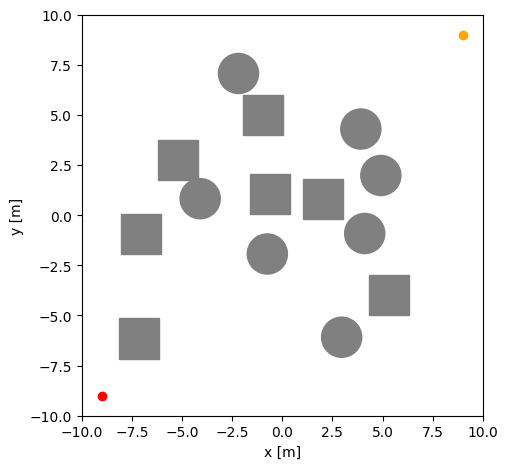

In [3]:
from envs.navigation_2d import Navigation2DEnv

env1 = Navigation2DEnv(v_min=0.0, v_max=2.0, omega_min=-1.0, omega_max=1.0, seed=42)
env1.plot()

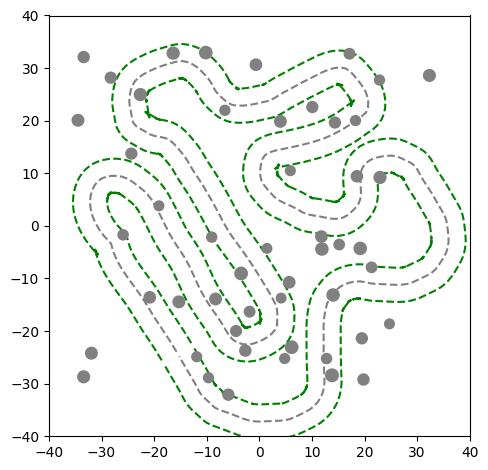

In [5]:
from envs.racing_env import RacingEnv

env2 = RacingEnv(acc_min=-2.0, acc_max=2.0, steer_min=-0.25, steer_max=0.25, seed=42)
env2.plot()

In [6]:
import torch

import navigation2d
from controller.mppi import MPPI
from controller.cem import CEM

mppi = MPPI(env=env1, horizon=30, num_samples=300, sigmas=torch.tensor([0.5, 0.5]), lambda_=1.0)
cem = CEM(env=env1, horizon=30, num_samples=300, sigmas=torch.tensor([0.5, 0.5]), iters=3, elite_ratio=0.1)

traj = navigation2d.main(env=env1, solver=mppi, max_steps=200) # save trajectory for plot

Device: cuda
Device: cuda


recording video:   0%|          | 0/200 [00:00<?, ?it/s]

Goal Reached!
average solve time: 57.423 ms
MoviePy - Building file video/navigation_2d.gif with imageio.



t:  68%|██████▊   | 102/150 [00:00<00:00, 1017.75it/s, now=None]
                                                                

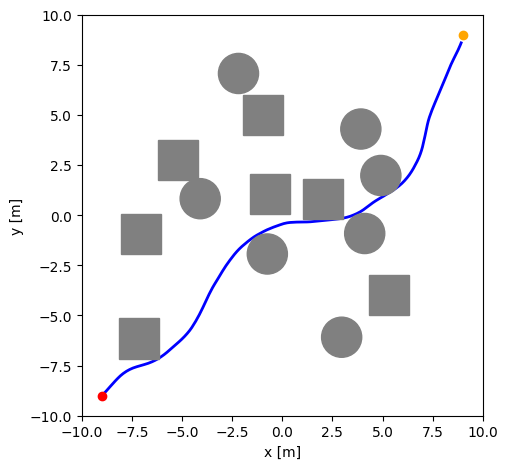

In [7]:
env1.plot()
env1._ax.plot(traj[:,0], traj[:,1], linewidth=2, color="blue")

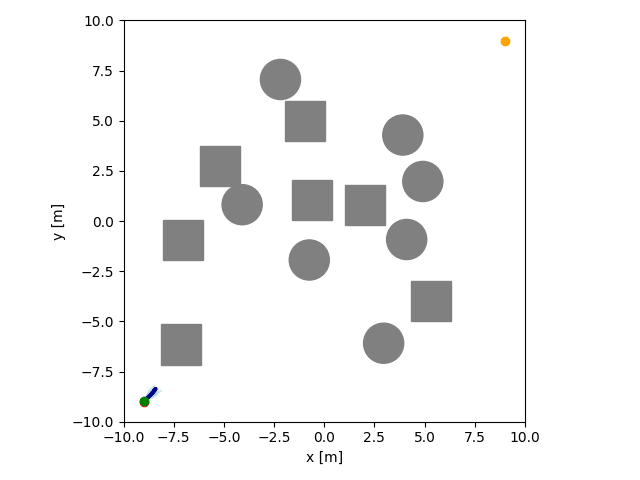

In [8]:
from IPython.display import Image

Image(filename='/content/video/navigation_2d.gif')

In [9]:
import torch

import racing
from controller.mppi import MPPI
from controller.cem import CEM

mppi = MPPI(env=env2, horizon=25, num_samples=300, sigmas=torch.tensor([0.5, 0.1]), lambda_=1.0)
cem = CEM(env=env2, horizon=25, num_samples=300, sigmas=torch.tensor([0.5, 0.1]), iters=3, elite_ratio=0.1)

traj = racing.main(env=env2, solver=cem, max_steps=200) # save trajectory for plot

Device: cuda
Device: cuda


recording video:   0%|          | 0/200 [00:00<?, ?it/s]

average solve time: 540.5406200885773  [ms]
MoviePy - Building file video/racing.gif with imageio.


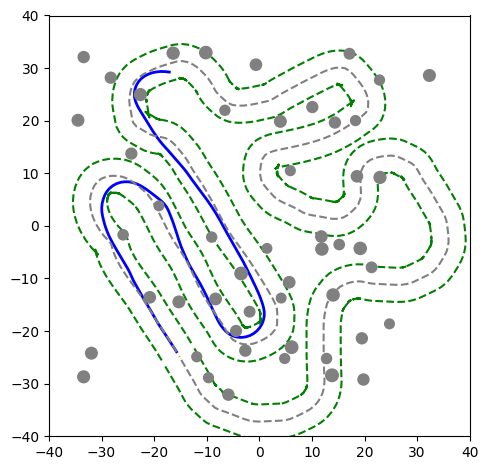

In [10]:
env2.plot()
env2._ax.plot(traj[:,0], traj[:,1], linewidth=2, color="blue")

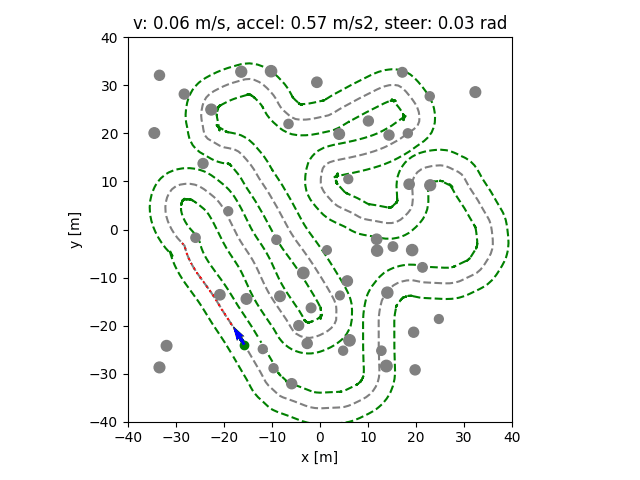

In [11]:
from IPython.display import Image

Image(filename='/content/video/racing.gif')